In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def _visualize_secant(func, points):
    # Determine plotting range based on points
    xs = [pt[0] for pt in points]
    min_x, max_x = min(xs) - 1, max(xs) + 1
    x_vals = np.linspace(min_x, max_x, 500)
    y_vals = func(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)

    # Draw secant lines
    for i in range(1, len(points)):
        x_prev, y_prev = points[i - 1]
        x_curr, y_curr = points[i]
        plt.plot([x_prev, x_curr], [y_prev, y_curr], 'r--', alpha=0.6)

    # Mark iterates
    for x, y in points:
        plt.plot(x, y, 'ko')

    plt.title("Secant Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:

def secant_method(func, x0, x1, tol=1e-5, max_iter=100, visualize=True):
    points = [(x0, func(x0)), (x1, func(x1))]

    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)

        if abs(f_x1 - f_x0) < tol:
            raise ValueError("Function values are too close to each other.")

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        points.append((x2, func(x2)))

        if abs(x2 - x1) < tol:
            if visualize:
                _visualize_secant(func, points)
            return x2

        x0, x1 = x1, x2

    if visualize:
        _visualize_secant(func, points)

    raise ValueError("Maximum iterations reached without convergence.")

In [4]:
def func_one(x):
    return x**2 - 4

def func_two(x):
    return x**3 - x - 2

def func_three(x):
    return 3*x + 2

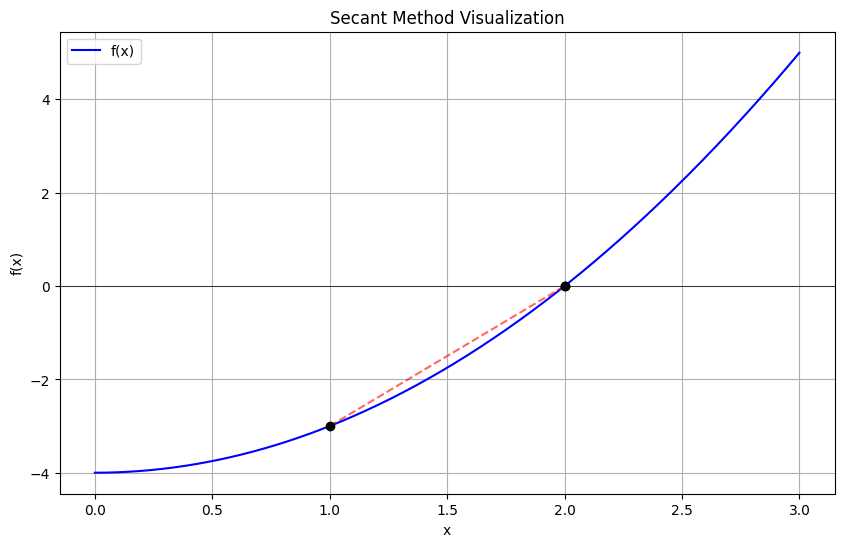

The root found is: 2.0


In [5]:
# Example usage:
function_variable = func_one
x0 = 1.0
x1 = 2.0
try:
    root = secant_method(function_variable, x0, x1)
    print(f"The root found is: {root}")
except ValueError as e:
    print(f"Error: {e}")

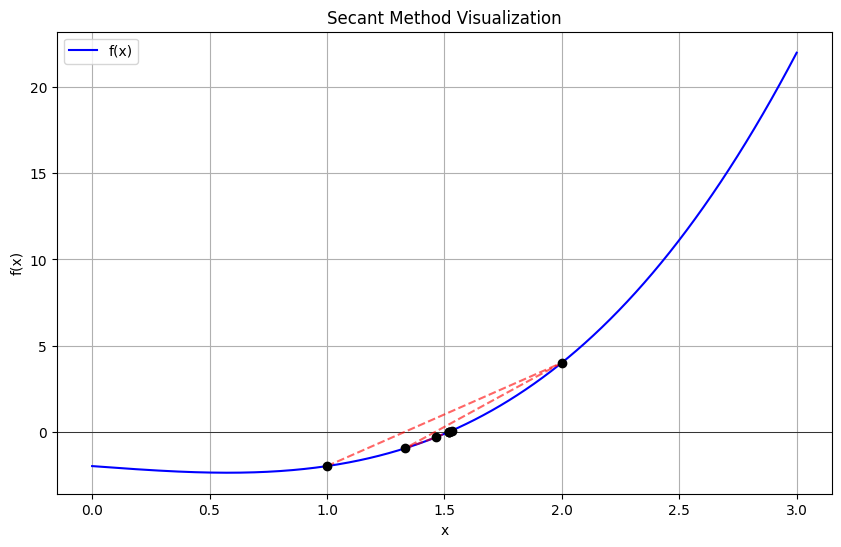

The root found is: 1.5213797079848717


In [6]:
function_variable = func_two
x0 = 1.0
x1 = 2.0
try:
    root = secant_method(function_variable, x0, x1)
    print(f"The root found is: {root}") 
except ValueError as e:
    print(f"Error: {e}")

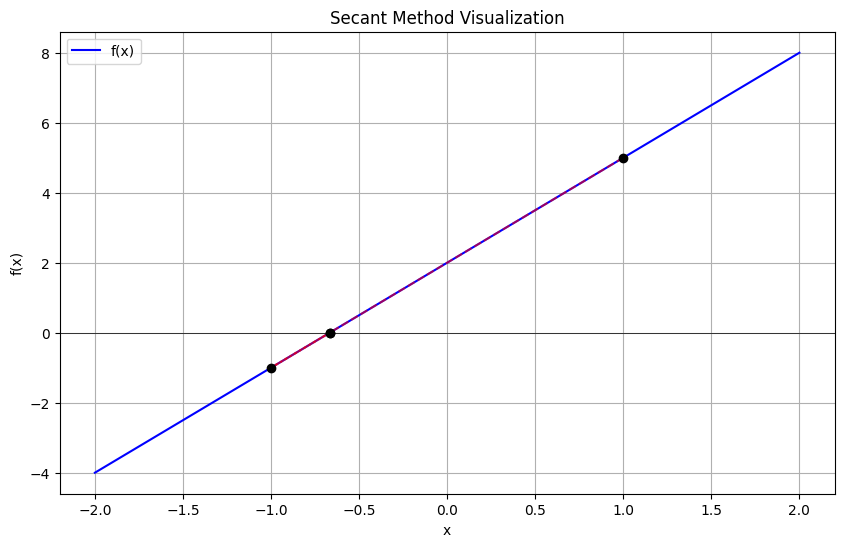

The root found is: -0.6666666666666667


In [7]:
function_variable = func_three
x0 = 1
x1 = -1

try:
    root = secant_method(function_variable, x0, x1)
    print(f"The root found is: {root}")
except ValueError as e:
    print(f"Error: {e}")